In [185]:
%matplotlib inline
#import fancyimpute
import matplotlib.pyplot as plt
import missingno as mn
import numpy as np
import pandas as pd
import io
import os
import glob
from sklearn import cluster, decomposition, pipeline, preprocessing
import statsmodels
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler


In [1]:
#Import dataset
#Import file from desktop
import io
from google.colab import files
df = files.upload()
#from google.colab import drive
#drive.mount('/content/drive')


Saving Kenya Customers.csv to Kenya Customers.csv
Saving Kenya Deliveries.csv to Kenya Deliveries.csv
Saving Kenya Orders.csv to Kenya Orders.csv
Saving Nigeria Customers.csv to Nigeria Customers.csv
Saving Nigeria Deliveries.csv to Nigeria Deliveries.csv
Saving Nigeria Orders.csv to Nigeria Orders.csv


TASK1:1. DATA MERGING INTO ONE FILE

In [5]:
##Data merging into one file
#combine all 6 csv files into one data frame df
extension='csv'
df = [i for i in glob.glob('*.{}'.format(extension))]
df = pd.concat([pd.read_csv(f) for f in df])
df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  """


,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing,Order ID,Order Status,Category Name,SKU,Customization Group,Customization Option,Quantity,...,Additional Charge,Taxable Amount,Transaction ID,Currency Symbol,Transaction Status,Promo Code,Customer ID,Merchant ID,Store Name,Pickup Address,Description,Distance (in km),Order Time,Pickup Time,Delivery Time,Ratings,Reviews,Merchant Earning,Commission Amount,Commission Payout Status,Order Preparation Time,Debt Amount,Redeemed Loyalty Points,Consumed Loyalty Points,Cancellation Reason,Flat Discount,Checkout Template Name,Checkout Template Value,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of Employees,Number of employees,Upload restuarant location,Agent_Name,Unnamed: 34,Unnamed: 35
0,368032956.0,"YR-11262518,0",3.680330e+29,Default Team,Delivery,NaN,1150142,-,-,Topup Mama,17 Feb 2022 12:04:02 pm,17 Feb 2022 02:30:00 pm,-,Assigned,-,0,-,6.544412,3.401738,NaN,-,Order_Details,5,₦ 104250.00,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,368032956.0,"YR-11262518,0",3.680330e+29,Default Team,Delivery,NaN,1150142,-,-,Topup Mama,17 Feb 2022 12:04:02 pm,17 Feb 2022 02:30:00 pm,-,Assigned,-,0,-,6.544412,3.401738,NaN,-,Order_Details,1,₦ 325.00,-,₦ 0.00,₦ 0.00,₦ 0.00,104575,CASH,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,368012178.0,"YR-11261796,0",3.680122e+29,Default Team,Delivery,NaN,1166840,11,-,Topup Mama,17 Feb 2022 11:10:30 am,17 Feb 2022 02:00:00 pm,-,In Transit,-,0,-,6.5558,3.392317,NaN,-,Order_Details,5,₦ 104250.00,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,368012178.0,"YR-11261796,0",3.680122e+29,Default Team,Delivery,NaN,1166840,11,-,Topup Mama,17 Feb 2022 11:10:30 am,17 Feb 2022 02:00:00 pm,-,In Transit,-,0,-,6.5558,3.392317,NaN,-,Order_Details,1,₦ 325.00,-,₦ 0.00,₦ 0.00,₦ 0.00,104575,CASH,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,367999205.0,"YR-11261341,0",3.679992e+29,Default Team,Delivery,NaN,1233220,-,-,Topup Mama,17 Feb 2022 10:33:11 am,17 Feb 2022 02:30:00 pm,-,Assigned,-,0,-,6.481961,3.347986,NaN,-,Order_Details,6,₦ 1950.00,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,-,NaN,NaN,NaN,NaN,NaN,10422797.0,COMPLETED,Beverages,KNBE0002,NaN,NaN,2.0,...,-,-,0.0,₦,NaN,NaN,4588145.0,1048159.0,Topup Mama,-,NaN,12006.82,2022-01-03T08:46:15.000Z,2022-01-03T08:44:22.000Z,2022-01-03T15:00:00.000Z,NaN,NaN,NaN,NaN,NaN,0.0,NaN,-,143,NaN,0.0,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

DATA CLEANING

In [6]:
#data types look out for object and float64 as they may contain missing values
df.dtypes

Task_ID                       float64
Order_ID                       object
Relationship                  float64
Team_Name                      object
Task_Type                      object
                               ...   
Number of employees           float64
Upload restuarant location     object
Agent_Name                     object
Unnamed: 34                    object
Unnamed: 35                    object
Length: 90, dtype: object

In [7]:
#shape of the combined dataframe
df.shape

(71945, 90)

In [8]:
# View columns names pf the combined dataframe
df.columns

Index(['Task_ID', 'Order_ID', 'Relationship', 'Team_Name', 'Task_Type',
       'Notes', 'Agent_ID', 'Distance(m)', 'Total_Time_Taken(min)',
       'Pick_up_From', 'Start_Before', 'Complete_Before', 'Completion_Time',
       'Task_Status', 'Ref_Images', 'Rating', 'Review', 'Latitude',
       'Longitude', 'Tags', 'Promo_Applied', 'Custom_Template_ID',
       'Task_Details_QTY', 'Task_Details_AMOUNT', 'Special_Instructions',
       'Tip', 'Delivery_Charges', 'Discount', 'Subtotal', 'Payment_Type',
       'Task_Category', 'Earning', 'Pricing', 'Order ID', 'Order Status',
       'Category Name', 'SKU', 'Customization Group', 'Customization Option',
       'Quantity', 'Unit Price', 'Cost Price', 'Total Cost Price',
       'Total Price', 'Order Total', 'Sub Total', 'Tax', 'Delivery Charge',
       'Remaining Balance', 'Payment Method', 'Additional Charge',
       'Taxable Amount', 'Transaction ID', 'Currency Symbol',
       'Transaction Status', 'Promo Code', 'Customer ID', 'Merchant ID',
   

In [9]:
#We may run a simple statistical description to understand the central tendencies of the combined data set.
# Simple Statistical Description
df.describe()

,Task_ID,Relationship,Longitude,Order ID,Customization Group,Customization Option,Quantity,Unit Price,Total Price,Order Total,Sub Total,Remaining Balance,Transaction ID,Transaction Status,Promo Code,Customer ID,Merchant ID,Distance (in km),Ratings,Merchant Earning,Commission Amount,Commission Payout Status,Order Preparation Time,Cancellation Reason,Flat Discount,Is Blocked,Outstanding Amount,Loyalty Points,Number of Employees,Number of employees
count,5.300200e+04,5.300200e+04,53002.000000,1.367100e+04,0.0,0.0,13671.000000,13671.000000,1.367100e+04,1.367100e+04,1.367100e+04,13671.0,13671.0,0.0,0.0,1.894300e+04,1.367100e+04,13671.000000,32.0,0.0,0.0,0.0,13671.0,0.0,13671.0,5272.000000,5272.0,5272.000000,6.050000e+02,3.139000e+03
mean,3.273199e+08,3.273199e+29,31.700802,1.086173e+07,NaN,NaN,2.660742,3018.519640,1.018708e+04,2.176395e+04,2.190261e+04,0.0,0.0,NaN,NaN,4.276536e+06,9.097154e+05,1269.862398,5.0,NaN,NaN,NaN,0.0,NaN,0.0,0.018399,0.0,110.023141,9.368496e+08,5.504071e+06
std,2.541199e+07,2.541199e+28,12.154744,2.404940e+05,NaN,NaN,4.341853,6091.088315,4.811819e+04,5.852532e+04,5.884280e+04,0.0,0.0,NaN,NaN,3.661067e+05,4.730190e+04,3670.350298,0.0,NaN,NaN,NaN,0.0,NaN,0.0,0.134402,0.0,597.896925,2.598402e+09,1.346578e+08
min,2.186499e+08,2.186499e+29,-122.401468,1.038727e+07,NaN,NaN,1.000000,20.000000,2.500000e+01,1.080000e+03,2.000000e+03,0.0,0.0,NaN,NaN,3.144837e+06,8.935550e+05,0.980000,5.0,NaN,NaN,NaN,0.0,NaN,0.0,0.000000,0.0,0.000000,1.000000e+00,-2.000000e+00
25%,3.062582e+08,3.062582e+29,36.782792,1.067458e+07,NaN,NaN,1.000000,120.000000,2.200000e+02,4.390080e+03,4.435000e+03,0.0,0.0,NaN,NaN,4.026966e+06,8.935550e+05,5.030000,5.0,NaN,NaN,NaN,0.0,NaN,0.0,0.000000,0.0,0.000000,2.000000e+00,2.000000e+00
50%,3.253174e+08,3.253174e+29,36.828960,1.086190e+07,NaN,NaN,1.000000,1390.000000,1.670000e+03,7.658000e+03,7.721000e+03,0.0,0.0,NaN,NaN,4.221486e+06,8.935550e+05,8.930000,5.0,NaN,NaN,NaN,0.0,NaN,0.0,0.000000,0.0,3.000000,3.000000e+00,2.000000e+00
75%,3.517854e+08,3.517854e+29,36.897591,1.107246e+07,NaN,NaN,2.000000,2180.000000,4.275000e+03,1.668500e+04,1.690000e+04,0.0,0.0,NaN,NaN,4.573044e+06,8.935550e+05,15.160000,5.0,NaN,NaN,NaN,0.0,NaN,0.0,0.000000,0.0,43.000000,5.000000e+00,3.000000e+00
max,3.681104e+08,3.681104e+29,77.209021,1.126502e+07,NaN,NaN,108.000000,62000.000000,1.257000e+06,1.252000e+06,1.257000e+06,0.0,0.0,NaN,NaN,5.189011e+06,1.048159e+06,12012.180000,5.0,NaN,NaN,NaN,0.0,NaN,0.0,1.000000,0.0,23307.000000,9.159746e+09,7.034704e+09


We can see that **'Longitudes'**,**'unit price'**,**'Distance'** and **'loyalty points'** have **outliers** because the larger the standard deviation to mean, the more spread the data,which may indicate some outliers in those attributes

2.2 Dealing with Missing Values 

A Pandas DataFrame, encodes missing values as Null (i.e. NaN). So, we can identify missing values by search all the NaN data points

In [10]:
#1. Check if the entire data set has any Null values

# Check if the entire data set has any Null values
df.isnull().values.any()

#isnull().values.any()* returns **True** for this data set, meaning we have missing values.

True

#isnull().values.any()* returns **True** for this data set, meaning we have missing values.

In [11]:
#2. Check which columns/attributes have Null values

# Check which columns have Null values
#df.isna().any()
# Check if any missing or NaN values
df.info


<bound method DataFrame.info of           Task_ID       Order_ID  ...  Unnamed: 34 Unnamed: 35
0     368032956.0  YR-11262518,0  ...          NaN         NaN
1     368032956.0  YR-11262518,0  ...          NaN         NaN
2     368012178.0  YR-11261796,0  ...          NaN         NaN
3     368012178.0  YR-11261796,0  ...          NaN         NaN
4     367999205.0  YR-11261341,0  ...          NaN         NaN
...           ...            ...  ...          ...         ...
1424          NaN            NaN  ...          NaN         NaN
1425          NaN            NaN  ...          NaN         NaN
1426          NaN            NaN  ...          NaN         NaN
1427          NaN            NaN  ...          NaN         NaN
1428          NaN            NaN  ...          NaN         NaN

[71945 rows x 90 columns]>


We observe that only columns **'Task_ID'**,**'Order_ID'**,**'Relationship'**,**'Team_Name'**,**'Task_Type'**,**'Number of employees**',**'Upload restuarant location'**,**'Agent_Name'**,**'Unnamed: 34'** and **'Unnamed: 35'** have Null values.

STEP 1:DATA CLEANING DELETE COLUMNS CONTAINING 70% OR MORE THAN 70% NaN VALUES

In [12]:
# Missing values
df.isna()

,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Notes,Agent_ID,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Tags,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing,Order ID,Order Status,Category Name,SKU,Customization Group,Customization Option,Quantity,...,Additional Charge,Taxable Amount,Transaction ID,Currency Symbol,Transaction Status,Promo Code,Customer ID,Merchant ID,Store Name,Pickup Address,Description,Distance (in km),Order Time,Pickup Time,Delivery Time,Ratings,Reviews,Merchant Earning,Commission Amount,Commission Payout Status,Order Preparation Time,Debt Amount,Redeemed Loyalty Points,Consumed Loyalty Points,Cancellation Reason,Flat Discount,Checkout Template Name,Checkout Template Value,Last Used Platform,Is Blocked,Created At,Language,Outstanding Amount,Loyalty Points,Number of Employees,Number of employees,Upload restuarant location,Agent_Name,Unnamed: 34,Unnamed: 35
0,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,True,True,True,True,True,False,False,False,False,True,True,False,...,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,True,True,True,True,False,True,False,False,True,False,Fal

In [13]:
#sum of missing values
#df.isna().sum()
df.isnull().sum()

Task_ID                       18943
Order_ID                      18943
Relationship                  18943
Team_Name                     18943
Task_Type                     18943
                              ...  
Number of employees           68806
Upload restuarant location    71926
Agent_Name                    26962
Unnamed: 34                   71836
Unnamed: 35                   71906
Length: 90, dtype: int64

In [14]:
#Percentage of column missing values
df.isna().mean() * 100

Task_ID                       26.329835
Order_ID                      26.329835
Relationship                  26.329835
Team_Name                     26.329835
Task_Type                     26.329835
                                ...    
Number of employees           95.636945
Upload restuarant location    99.973591
Agent_Name                    37.475850
Unnamed: 34                   99.848495
Unnamed: 35                   99.945792
Length: 90, dtype: float64

In [15]:
# Delete columns containing either 70% or more than 70% NaN Values
perc = 70.0
min_count =  int(((100-perc)/100)*df.shape[0] + 1)
df = df.dropna( axis=1, 
                thresh=min_count)
print("Modified Dataframe : ")
print(df)

Modified Dataframe : 
          Task_ID       Order_ID  Relationship  ... Earning Pricing Agent_Name
0     368032956.0  YR-11262518,0  3.680330e+29  ...       -       -        NaN
1     368032956.0  YR-11262518,0  3.680330e+29  ...       -       -        NaN
2     368012178.0  YR-11261796,0  3.680122e+29  ...       -       -        NaN
3     368012178.0  YR-11261796,0  3.680122e+29  ...       -       -        NaN
4     367999205.0  YR-11261341,0  3.679992e+29  ...       -       -        NaN
...           ...            ...           ...  ...     ...     ...        ...
1424          NaN            NaN           NaN  ...     NaN     NaN        NaN
1425          NaN            NaN           NaN  ...     NaN     NaN        NaN
1426          NaN            NaN           NaN  ...     NaN     NaN        NaN
1427          NaN            NaN           NaN  ...     NaN     NaN        NaN
1428          NaN            NaN           NaN  ...     NaN     NaN        NaN

[71945 rows x 32 columns]


Therefore i have dropped columns with 75% missing values using dropna thresh-

As a rule of thumb, when the data goes missing on 60–70 percent of the variable, dropping the variable should be considered and Filled the missing data with the mean and median value if it's a numerical variable and for categorical values Filled the missing data with mode

In [16]:
#View data frame after dropping attributes with 70% NaN values- we remain with32 attributes for our Analysis
df

,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Agent_ID,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing,Agent_Name
0,368032956.0,"YR-11262518,0",3.680330e+29,Default Team,Delivery,1150142,-,-,Topup Mama,17 Feb 2022 12:04:02 pm,17 Feb 2022 02:30:00 pm,-,Assigned,-,0,-,6.544412,3.401738,-,Order_Details,5,₦ 104250.00,-,-,-,-,-,-,-,-,-,NaN
1,368032956.0,"YR-11262518,0",3.680330e+29,Default Team,Delivery,1150142,-,-,Topup Mama,17 Feb 2022 12:04:02 pm,17 Feb 2022 02:30:00 pm,-,Assigned,-,0,-,6.544412,3.401738,-,Order_Details,1,₦ 325.00,-,₦ 0.00,₦ 0.00,₦ 0.00,104575,CASH,-,-,-,NaN
2,368012178.0,"YR-11261796,0",3.680122e+29,Default Team,Delivery,1166840,11,-,Topup Mama,17 Feb 2022 11:10:30 am,17 Feb 2022 02:00:00 pm,-,In Transit,-,0,-,6.5558,3.392317,-,Order_Details,5,₦ 104250.00,-,-,-,-,-,-,-,-,-,NaN
3,368012178.0,"YR-11261796,0",3.680122e+29,Default Team,Delivery,1166840,11,-,Topup Mama,17 Feb 2022 11:10:30 am,17 Feb 2022 02:00:00 pm,-,In Transit,-,0,-,6.5558,3.392317,-,Order_Details,1,₦ 325.00,-,₦ 0.00,₦ 0.00,₦ 0.00,104575,CASH,-,-,-,NaN
4,367999205.0,"YR-11261341,0",3.679992e+29,Default Team,Delivery,1233220,-,-,Topup Mama,17 Feb 2022 10:33:11 am,17 Feb 2022 02:30:00 pm,-,Assigned,-,0,-,6.481961,3.347986,-,Order_Details,6,₦ 1950.00,-,-,-,-,-,-,-,-,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN
1425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN
1426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN
1427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Check missing values (second time dealing with a big data)
df.isnull().sum()

Task_ID                  18943
Order_ID                 18943
Relationship             18943
Team_Name                18943
Task_Type                18943
Agent_ID                 18943
Distance(m)              18943
Total_Time_Taken(min)    18943
Pick_up_From             18943
Start_Before             18943
Complete_Before          18943
Completion_Time          18943
Task_Status              18943
Ref_Images               18943
Rating                   18943
Review                   18968
Latitude                 18943
Longitude                18943
Promo_Applied            19052
Custom_Template_ID       18943
Task_Details_QTY         18943
Task_Details_AMOUNT      18943
Special_Instructions     18943
Tip                       5272
Delivery_Charges         18943
Discount                  5272
Subtotal                 18943
Payment_Type             18943
Task_Category            18943
Earning                  18943
Pricing                  18943
Agent_Name               26962
dtype: i

In [19]:
#Percentage of column missing values
df.isna().mean() * 100

Task_ID                  26.329835
Order_ID                 26.329835
Relationship             26.329835
Team_Name                26.329835
Task_Type                26.329835
Agent_ID                 26.329835
Distance(m)              26.329835
Total_Time_Taken(min)    26.329835
Pick_up_From             26.329835
Start_Before             26.329835
Complete_Before          26.329835
Completion_Time          26.329835
Task_Status              26.329835
Ref_Images               26.329835
Rating                   26.329835
Review                   26.364584
Latitude                 26.329835
Longitude                26.329835
Promo_Applied            26.481340
Custom_Template_ID       26.329835
Task_Details_QTY         26.329835
Task_Details_AMOUNT      26.329835
Special_Instructions     26.329835
Tip                       7.327820
Delivery_Charges         26.329835
Discount                  7.327820
Subtotal                 26.329835
Payment_Type             26.329835
Task_Category       

From the name of the attributes, we can distinguish that three columns are spectific for identifying each order. We need to drop them from the dataset as they are not going to be useful for the analysis.

In [20]:
#df.drop('Task_ID',
 # axis=1, inplace=True)
#df.drop('Custom_Template_ID',
 # axis=1, inplace=True)
df.drop('Agent_ID',
  axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [22]:
#3. We replace the NaN values with the **Mode** and **median** for categorical and Nu,erical attributes respectively
# Update missing values
df['Tip'].fillna((df['Tip'].mode()), inplace=True)
df['Discount'].fillna((df['Discount'].mode()), inplace=True)
df['Order_ID'].fillna((df['Order_ID'].mode()), inplace=True)
df['Relationship'].fillna((df['Relationship'].mode()), inplace=True)
df['Team_Name'].fillna((df['Team_Name'].mode()), inplace=True)
df['Task_Type'].fillna((df['Task_Type'].mode()), inplace=True)

df['Distance(m)'].fillna((df['Distance(m)'].mode()), inplace=True)
df['Total_Time_Taken(min)'].fillna((df['Total_Time_Taken(min)'].mode()), inplace=True)
df['Pick_up_From'].fillna((df['Pick_up_From'].mode()), inplace=True)
df['Start_Before'].fillna((df['Start_Before'].mode()), inplace=True)
df['Rating'].fillna((df['Rating'].mode()), inplace=True)
df['Review'].fillna((df['Review'].mode()), inplace=True)
df['Longitude'].fillna((df['Longitude'].mean()), inplace=True)

df['Promo_Applied'].fillna((df['Promo_Applied'].mode()), inplace=True)
df['Task_Details_QTY'].fillna((df['Task_Details_QTY'].mode()), inplace=True)
df['Task_Details_AMOUNT'].fillna((df['Task_Details_AMOUNT'].mode()), inplace=True)
df['Special_Instructions'].fillna((df['Special_Instructions'].mode()), inplace=True)
df['Delivery_Charges'].fillna((df['Delivery_Charges'].mode()), inplace=True)
df['Subtotal'].fillna((df['Subtotal'].mode()), inplace=True)
df['Payment_Type'].fillna((df['Payment_Type'].mode()), inplace=True)

df['Task_Category'].fillna((df['Task_Category'].mode()), inplace=True)
df['Earning'].fillna((df['Earning'].mode()), inplace=True)

df['Agent_Name'].fillna((df['Agent_Name'].mode()), inplace=True)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,Task_ID,Order_ID,Relationship,Team_Name,Task_Type,Distance(m),Total_Time_Taken(min),Pick_up_From,Start_Before,Complete_Before,Completion_Time,Task_Status,Ref_Images,Rating,Review,Latitude,Longitude,Promo_Applied,Custom_Template_ID,Task_Details_QTY,Task_Details_AMOUNT,Special_Instructions,Tip,Delivery_Charges,Discount,Subtotal,Payment_Type,Task_Category,Earning,Pricing,Agent_Name
0,368032956.0,"YR-11262518,0",3.680330e+29,Default Team,Delivery,-,-,Topup Mama,17 Feb 2022 12:04:02 pm,17 Feb 2022 02:30:00 pm,-,Assigned,-,0,-,6.544412,3.401738,-,Order_Details,5,₦ 104250.00,-,-,-,-,-,-,-,-,-,Peter Mwaura
1,368032956.0,"YR-11262518,0",3.680330e+29,Default Team,Delivery,-,-,Topup Mama,17 Feb 2022 12:04:02 pm,17 Feb 2022 02:30:00 pm,-,Assigned,-,0,-,6.544412,3.401738,-,Order_Details,1,₦ 325.00,-,₦ 0.00,₦ 0.00,₦ 0.00,104575,CASH,-,-,-,NaN
2,368012178.0,"YR-11261796,0",3.680122e+29,Default Team,Delivery,11,-,Topup Mama,17 Feb 2022 11:10:30 am,17 Feb 2022 02:00:00 pm,-,In Transit,-,0,-,6.5558,3.392317,-,Order_Details,5,₦ 104250.00,-,-,-,-,-,-,-,-,-,NaN
3,368012178.0,"YR-11261796,0",3.680122e+29,Default Team,Delivery,11,-,Topup Mama,17 Feb 2022 11:10:30 am,17 Feb 2022 02:00:00 pm,-,In Transit,-,0,-,6.5558,3.392317,-,Order_Details,1,₦ 325.00,-,₦ 0.00,₦ 0.00,₦ 0.00,104575,CASH,-,-,-,NaN
4,367999205.0,"YR-11261341,0",3.679992e+29,Default Team,Delivery,-,-,Topup Mama,17 Feb 2022 10:33:11 am,17 Feb 2022 02:30:00 pm,-,Assigned,-,0,-,6.481961,3.347986,-,Order_Details,6,₦ 1950.00,-,-,-,-,-,-,-,-,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.700802,NaN,NaN,NaN,NaN,NaN,-,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN
1425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.700802,NaN,NaN,NaN,NaN,NaN,-,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN
1426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.700802,NaN,NaN,NaN,NaN,NaN,-,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN
1427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.700802,NaN,NaN,NaN,NaN,NaN,-,NaN,-,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
len(df['Rating'].unique())

7

In [24]:
df.Rating.value_counts()

0    44784
0     7999
-      109
5       90
5       20
1        4
Name: Rating, dtype: int64

In [25]:
(df['Rating'].unique())

array([0, 5, '0', nan, '5', '-', '1'], dtype=object)

In [27]:
df = df.dropna()#drop all NaN values
df['Rating'] = df['Rating'].astype(int)

In [28]:
#Check missing values (confirm if we have any missing values)
df.isnull().sum()

Task_ID                  0
Order_ID                 0
Relationship             0
Team_Name                0
Task_Type                0
Distance(m)              0
Total_Time_Taken(min)    0
Pick_up_From             0
Start_Before             0
Complete_Before          0
Completion_Time          0
Task_Status              0
Ref_Images               0
Rating                   0
Review                   0
Latitude                 0
Longitude                0
Promo_Applied            0
Custom_Template_ID       0
Task_Details_QTY         0
Task_Details_AMOUNT      0
Special_Instructions     0
Tip                      0
Delivery_Charges         0
Discount                 0
Subtotal                 0
Payment_Type             0
Task_Category            0
Earning                  0
Pricing                  0
Agent_Name               0
dtype: int64

In [29]:
len(df['Payment_Type'].unique())

32

In [30]:
df.Payment_Type.value_counts()

-                                                      24297
CASH                                                   20309
Pay Later                                                190
paybill                                                   10
Paybill                                                    7
PAYBILL                                                    7
mpesa                                                      7
To pay later                                               6
To pay later.                                              2
To pay after 3days                                         1
To pay in the evening.                                     1
CASH 4000 Bal 1489                                         1
To pay later on paybill                                    1
CASH 3629. Paybill 14516                                   1
To pay later in the evening                                1
paid 4000 on paybill, 16005 in Cash                        1
CASH 3149 Paybill 800   

In [31]:
# View columns available for analysis
df.columns

Index(['Task_ID', 'Order_ID', 'Relationship', 'Team_Name', 'Task_Type',
       'Distance(m)', 'Total_Time_Taken(min)', 'Pick_up_From', 'Start_Before',
       'Complete_Before', 'Completion_Time', 'Task_Status', 'Ref_Images',
       'Rating', 'Review', 'Latitude', 'Longitude', 'Promo_Applied',
       'Custom_Template_ID', 'Task_Details_QTY', 'Task_Details_AMOUNT',
       'Special_Instructions', 'Tip', 'Delivery_Charges', 'Discount',
       'Subtotal', 'Payment_Type', 'Task_Category', 'Earning', 'Pricing',
       'Agent_Name'],
      dtype='object')

In [32]:
# converting Subtotal column  format from string to numeric, and filling its Null values with 0.

df['Subtotal'] = pd.to_numeric(df['Subtotal'], downcast="float", errors='coerce')

df = df.fillna(0)
df['Subtotal'] 

0            0.0
0            0.0
1         4700.0
2        19500.0
3         4350.0
          ...   
44978     6240.0
44979     3990.0
44980        0.0
44981        0.0
44982     7040.0
Name: Subtotal, Length: 44858, dtype: float32

In [33]:
len(df['Earning'].unique())

2

In [34]:
df.Earning.value_counts()

-    28754
0    16104
Name: Earning, dtype: int64

In [35]:
df['Earning'] = pd.to_numeric(df['Earning'], downcast="float", errors='coerce')

df = df.fillna(1)
df['Earning']

0        1.0
0        1.0
1        1.0
2        1.0
3        1.0
        ... 
44978    1.0
44979    1.0
44980    1.0
44981    1.0
44982    1.0
Name: Earning, Length: 44858, dtype: float32

In [56]:
len(df['Task_Details_QTY'].unique())

74

In [57]:
df.Task_Details_QTY.value_counts()

1      25857
2       7273
3       2811
5       2284
10      1639
       ...  
63         1
31         1
49         1
180        1
128        1
Name: Task_Details_QTY, Length: 74, dtype: int64

Exploratory Data Analysis

Because our target variable is retention, i should analyse the data focusing on how the different features are related to this variable.I set  customers who have purchased 2 or more quantities as retained while customers who had purchased less than 2 quantities as churned/exited customers

In [193]:
df.Task_Details_QTY

0         5.0
0         1.0
1        12.0
2        10.0
3         1.0
         ... 
44978     1.0
44979    10.0
44980     1.0
44981     1.0
44982    10.0
Name: Task_Details_QTY, Length: 44858, dtype: float32

In [ ]:
df.Task_Details_QTY

In [397]:
df['Task_Details_QTY']= pd.to_numeric(df['Task_Details_QTY'], downcast="float", errors='coerce')
df['Task_Details_QTY']

0        100.0
0        100.0
1        100.0
2        100.0
3        100.0
         ...  
44978    100.0
44979    100.0
44980    100.0
44981    100.0
44982    100.0
Name: Task_Details_QTY, Length: 44858, dtype: float32

In [396]:
retained = df[df['Task_Details_QTY'] >=2 ]['Task_Details_QTY'].count() / df.shape[0] * 100
exited = df[df['Task_Details_QTY'] <2 ]['Task_Details_QTY'].count() / df.shape[0] * 100
retained

100.0

In [392]:
exited

0.0

In [140]:
df['Task_Details_QTY']

0         5.0
0         1.0
1        12.0
2        10.0
3         1.0
         ... 
44978     1.0
44979    10.0
44980     1.0
44981     1.0
44982    10.0
Name: Task_Details_QTY, Length: 44858, dtype: float32

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


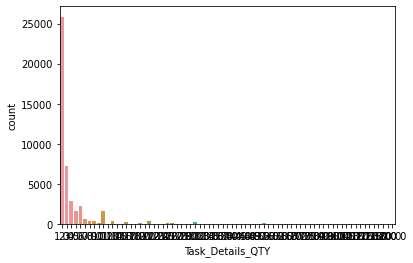

In [179]:
sns.countplot(df['Task_Details_QTY'],label="Count")

In [99]:
df[df['Task_Details_QTY'] >=2 ]['Task_Details_QTY'].count()

19000

In [39]:
df.Task_Status.value_counts()


Completed     40050
Cancelled      2897
Failed         1838
Unassigned       71
Assigned          1
Declined          1
Name: Task_Status, dtype: int64

In [40]:
len(df['Task_Status'].unique())

6

TASK 3:USE ML MODEL(S) TO PREDICT CUSTOMER RETENTION

Train/Test split

In [196]:
X = df.loc[:, df.columns != 'Subtotal']
Y = df.Subtotal
Y

0            0.0
0            0.0
1         4700.0
2        19500.0
3         4350.0
          ...   
44978     6240.0
44979     3990.0
44980        0.0
44981        0.0
44982     7040.0
Name: Subtotal, Length: 44858, dtype: float32

In [113]:
# PCA
cols = ['Rating','Subtotal','Task_Status','Task_Details_QTY']
# standardize data
model = pipeline.Pipeline([('std', preprocessing.StandardScaler()),
                            ('pca', decomposition.PCA(random_state=42))])
X = pd.get_dummies(df[cols], drop_first=True).fillna(0)
X_pca = model.fit_transform(X)
pca = model.named_steps['pca']

In [328]:
X_pca.shape

(44858, 8)

In [115]:
model.steps

[('std', StandardScaler()), ('pca', PCA(random_state=42))]

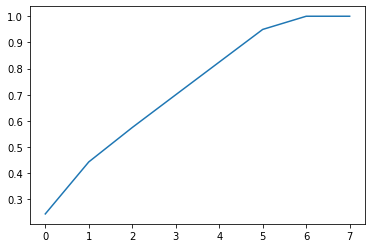

In [116]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [117]:
np.cumsum(pca.explained_variance_ratio_)

array([0.24382554, 0.4427343 , 0.57435877, 0.69964437, 0.82464793,
       0.94955318, 0.99998586, 1.        ])

In [118]:
# Find columns that most influence components
comps = pd.DataFrame(pca.components_, columns=X.columns)
pca_cols = set()
num_comps = 2
for i in range(num_comps):
    parts = comps.iloc[i][comps.iloc[i].abs() > .2]
    pca_cols.update(set(parts.index))
pca_cols

{'Subtotal',
 'Task_Details_QTY',
 'Task_Status_Cancelled',
 'Task_Status_Completed',
 'Task_Status_Failed'}

In [119]:
# How original columns impact each component
pd.DataFrame(pca.components_, columns=X.columns).loc[:,list(pca_cols)].T

,0,1,2,3,4,5,6,7
Task_Status_Completed,-0.711156,0.090868,-0.011736,-0.004597,-0.000130,-0.011569,0.001520,-0.696925
Task_Status_Failed,0.415993,-0.067555,0.780693,-0.102938,-0.009572,0.051281,-0.010226,-0.446635
Task_Details_QTY,0.088178,0.701313,0.007289,0.013769,0.001773,-0.015708,-0.707030,-0.000033
Subtotal,0.090703,0.700798,0.023448,0.009778,0.001698,-0.008291,0.707064,0.000037
Task_Status_Cancelled,0.547059,-0.055865,-0.619209,-0.070707,-0.004961,-0.049475,0.006166,-0.553784


In [120]:
# add coloring
(pd.DataFrame(pca.components_, columns=X.columns)
 .loc[:,list(pca_cols)]
 .T
 .style.background_gradient(cmap='RdBu', axis=0)
)

,0,1,2,3,4,5,6,7
Task_Status_Completed,-0.711156,0.090868,-0.011736,-0.004597,-0.000130,-0.011569,0.001520,-0.696925
Task_Status_Failed,0.415993,-0.067555,0.780693,-0.102938,-0.009572,0.051281,-0.010226,-0.446635
Task_Details_QTY,0.088178,0.701313,0.007289,0.013769,0.001773,-0.015708,-0.707030,-0.000033
Subtotal,0.090703,0.700798,0.023448,0.009778,0.001698,-0.008291,0.707064,0.000037
Task_Status_Cancelled,0.547059,-0.055865,-0.619209,-0.070707,-0.004961,-0.049475,0.006166,-0.553784


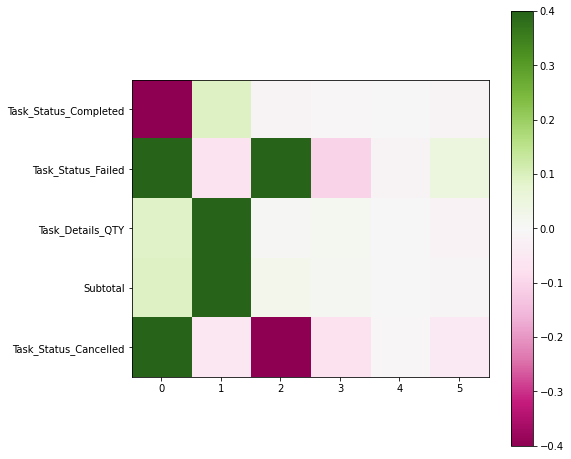

In [121]:
#Alternate view
fig, ax = plt.subplots(figsize=(8,8))
plt.imshow(pd.DataFrame(pca.components_, columns=X.columns).loc[:5, list(pca_cols)].T, 
           cmap='PiYG', vmin=-.4, vmax=.4)
plt.yticks(range(len(pca_cols)), list(pca_cols))
plt.colorbar()

In [178]:
# Check Task status for churning and non churning customers
pd.DataFrame(df.groupby('Task_Details_QTY')['Task_Status'].describe())

,count,unique,top,freq
Task_Details_QTY,,,,
1.0,25857,4,Completed,23029
2.0,7273,5,Completed,6547
3.0,2811,4,Completed,2501
4.0,1622,3,Completed,1476
5.0,2284,5,Completed,2094
...,...,...,...,...
128.0,1,1,Completed,1
133.0,1,1,Completed,1
150.0,34,3,Completed,31


In [377]:
x = [df.Task_Details_QTY,df.Task_Details_QTY]
y = [df.Subtotal,df.Subtotal]


In [378]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)

In [379]:
x = np.array(x)
y = np.array(y)

Support Vector Machine-We are ready to build different models looking for the best fit. Predicting customer churn is a binary classification problem: Customers are either lost or retained in a given period of time.

In [380]:
param_grid_svm = {
    'C': [0.5, 100, 150],
    'kernel': ['rbf'],
    'gamma': [0.1, 0.01, 0.001],
    'probability': [True]
}

In [372]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=2)

In [373]:
svm_first = SVC()
svm_grid = GridSearchCV(svm_first, param_grid=param_grid_svm, cv=1, verbose=1, n_jobs=-2)


In [381]:
x

array([[ 5.,  1., 12., ...,  1.,  1., 10.],
       [ 5.,  1., 12., ...,  1.,  1., 10.]], dtype=float32)

In [382]:
y

array([[   0.,    0., 4700., ...,    0.,    0., 7040.],
       [   0.,    0., 4700., ...,    0.,    0., 7040.]], dtype=float32)

In [398]:
#svm_grid.fit(x, y)